In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tarfile

In [5]:
# # extract tarfile 
# tar = tarfile.open('UKIRT/CASU_16_11_1.tar')
# tar.extractall()
# tar.close()

In [71]:
import os
import re
from tqdm import tqdm
directory = 'CASU_16_11_1'

mag = []
emag = []
for filename in tqdm(sorted(os.listdir(directory))):
    if filename.endswith(".tbl"): 
#         print(os.path.join(directory, filename))
        tmp=pd.read_table(os.path.join(directory, filename), skiprows=21, 
                 delim_whitespace=True, 
                 header=None,
                 index_col=0,                          
                 names=['hjd', 'mag', 'emag']
                )

        # Use Regex to get Index ID
        idx = re.findall("(\d{7})", filename)[0]
        # print(idx)
        mag.append(tmp['mag'].rename(idx))
        emag.append(tmp['emag'].rename(idx))
    else:
        continue

pd.concat(mag,axis=1).T.to_pickle(directory+'_mag.pkl')
pd.concat(emag,axis=1).T.to_pickle(directory+'_emag.pkl')

100%|██████████| 89962/89962 [02:20<00:00, 638.96it/s]


In [72]:
pd.concat(mag,axis=1).T

hjd,7487.06988,7487.11495,7488.04462,7488.09038,7489.04510,7489.10259,7490.05190,7490.10377,7491.05685,7491.10734,...,7574.92093,7575.80421,7575.85813,7575.90717,7576.82917,7576.87581,7576.92400,7577.80493,7577.85231,7577.89861
0000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0089958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0089959,NaN,14.195,NaN,14.212,NaN,14.160,NaN,14.190,NaN,14.212,...,14.208,NaN,14.148,14.142,NaN,14.181,14.182,14.225,14.190,14.241
0089960,NaN,16.411,NaN,16.500,16.309,16.336,NaN,16.419,NaN,16.413,...,NaN,16.417,16.329,16.339,16.378,16.373,16.437,NaN,16.421,NaN
0089961,NaN,17.645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.650,...,NaN,NaN,NaN,17.465,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
k2=pd.read_table('ukirt_c_2016_s_61_3_0049492_h_lc.tbl', skiprows=21, 
                 delim_whitespace=True, 
                 header=None,
                 names=['hjd', 'mag', 'emag']
                )

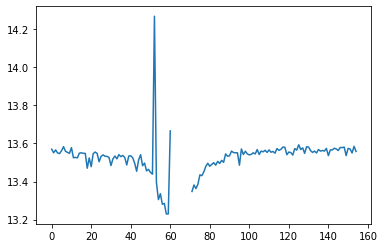

In [21]:
plt.plot(k2.mag)

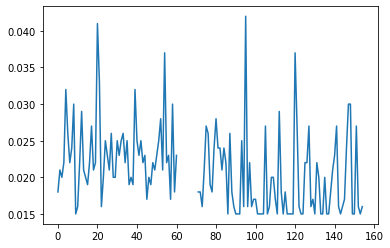

In [22]:
plt.plot(k2.emag)

# 

In [81]:
kplr1=pd.read_table('kplr002304168-2009131105131_llc_lc.tbl', 
                skiprows=(lambda x: x in np.concatenate((np.arange(0,203), np.array([204,205,206])))), 
                 delim_whitespace=True, 
                 header=[0])

kplr1

,|,TIME|,TIME_BJD|,TIMECORR|,CADENCENO|,SAP_FLUX|,SAP_FLUX_ERR|,SAP_BKG|,SAP_BKG_ERR|,PDCSAP_FLUX|,...,PSF_CENTR1|,PSF_CENTR1_ERR|,PSF_CENTR2|,PSF_CENTR2_ERR|,MOM_CENTR1|,MOM_CENTR1_ERR|,MOM_CENTR2|,MOM_CENTR2_ERR|,POS_CORR1|,POS_CORR2|
0,120.539231,2.454954e+06,0.001079,568,156077.48,11.805399,3560.9319,1.102645,162651.70,12.381019,...,0.000048,661.38985,0.000056,946.32026,0.000090,661.36391,0.000116,0.006427,0.009318,NaN
1,120.559666,2.454954e+06,0.001080,569,156155.69,11.807277,3554.6802,1.101741,162172.00,12.370324,...,0.000048,661.38910,0.000056,946.31958,0.000090,661.36327,0.000116,0.005958,0.008633,NaN
2,120.580100,2.454954e+06,0.001081,570,156301.94,11.811130,3555.8135,1.101231,162435.03,12.365074,...,0.000048,661.38909,0.000056,946.31937,0.000090,661.36335,0.000116,0.005306,0.008658,NaN
3,120.600535,2.454954e+06,0.001082,571,156529.05,11.817198,3554.0684,1.103560,162782.52,12.392515,...,0.000048,661.38931,0.000056,946.31868,0.000090,661.36333,0.000115,0.004760,0.008802,NaN
4,120.620970,2.454954e+06,0.001083,572,155955.50,11.801789,3557.4211,1.101613,162295.53,12.353902,...,0.000048,661.38889,0.000056,946.31839,0.000090,661.36349,0.000116,0.003878,0.008359,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,130.163936,2.454963e+06,0.001559,1039,156030.45,11.801560,3465.1477,1.100699,162048.44,12.345176,...,0.000048,661.36687,0.000055,946.31603,0.000090,661.35046,0.000116,-0.003879,-0.012752,NaN
472,130.184370,2.454963e+06,0.001560,1040,156948.59,11.827098,3461.5474,1.101613,162677.11,12.399176,...,0.000048,661.36620,0.000055,946.31569,0.000090,661.34987,0.000115,-0.004104,-0.013418,NaN
473,130.204805,2.454963e+06,0.001561,1041,156280.41,11.807964,3462.5806,1.100992,161668.45,12.357763,...,0.000048,661.36706,0.000055,946.31583,0.000090,661.35053,0.000116,-0.004036,-0.012679,NaN
474,130.225240,2.454963e+06,0.001562,1042,155103.31,11.776602,3462.5195,1.101068,160239.64,12.344419,...,0.000049,661.36621,0.000056,946.31633,0.000091,661.35025,0.000117,-0.003965,-0.013497,NaN


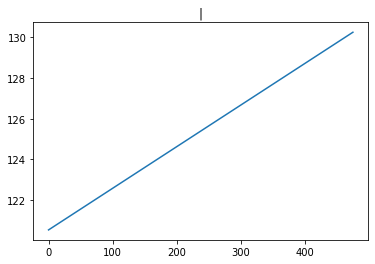

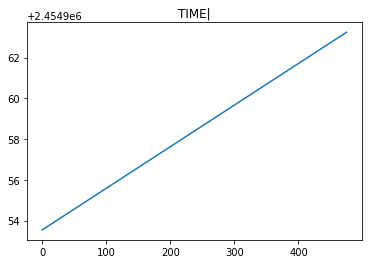

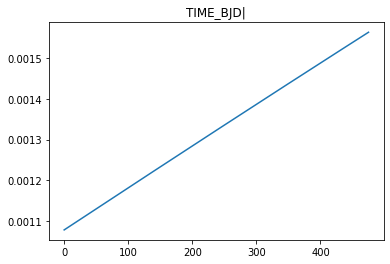

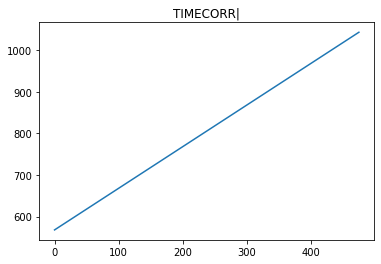

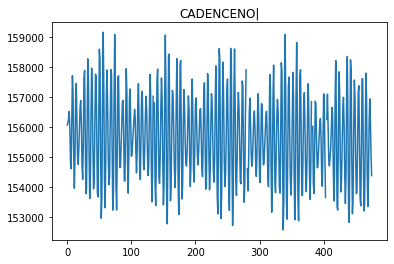

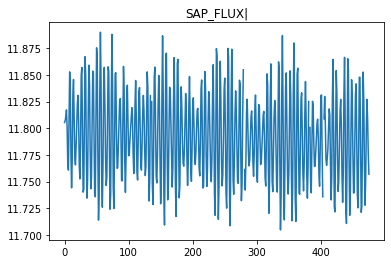

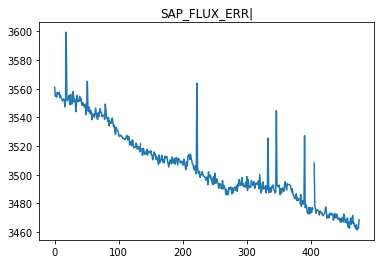

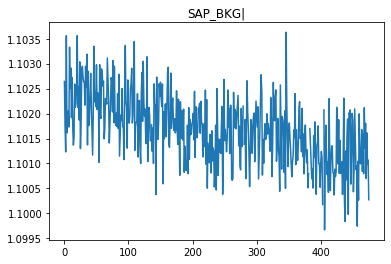

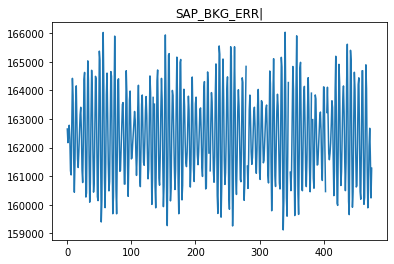

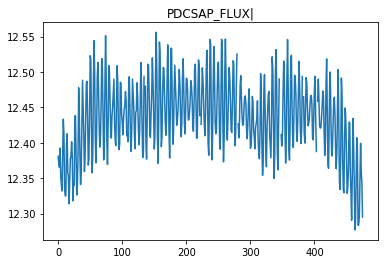

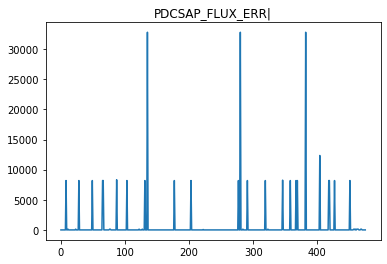

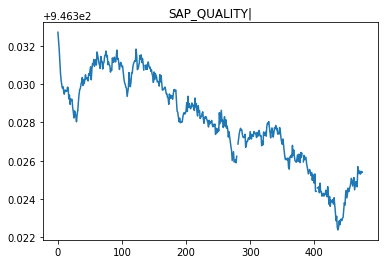

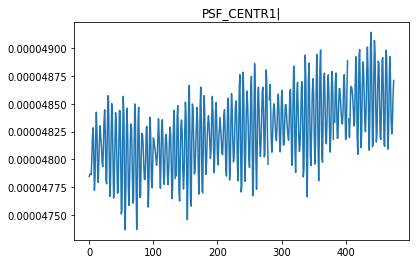

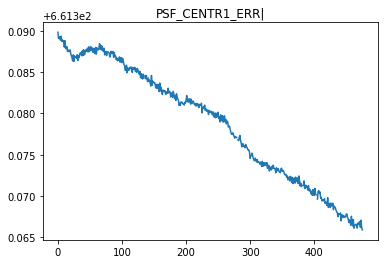

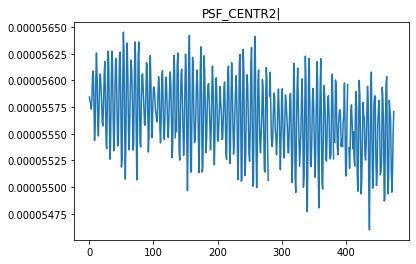

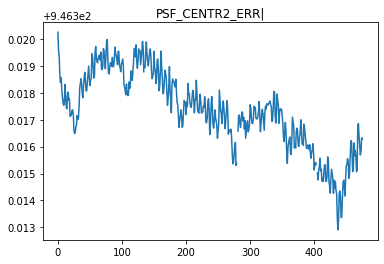

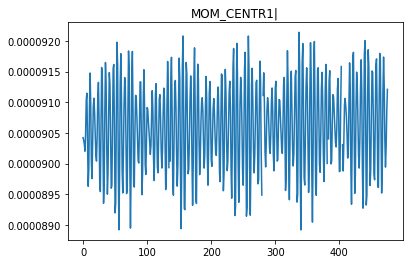

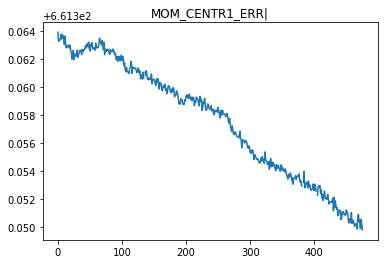

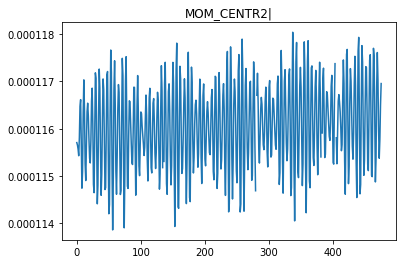

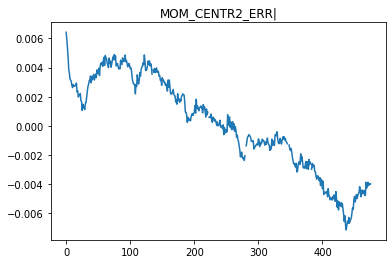

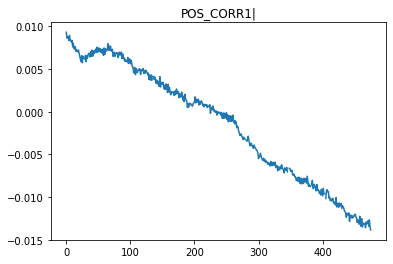

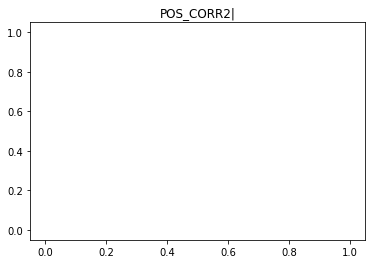

In [105]:
for i in range(22):
    plt.plot(kplr1.iloc[:,i])
    plt.title(kplr1.iloc[:,i].name)
    plt.show()